## Step 1: Data Import and Overview
In this step, we load the dataset, check its structure, and identify any potential issues like missing data. Then, we clean the data by handling missing values, converting data types, or filtering unnecessary columns.

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('sold_items.csv')

In [5]:
df.product_description.head(2)

0    Miu Miu – Pleated mini skirt Size: 36 (S)  Wai...
1    Tweed suit with lace edges. In perfect conditi...
Name: product_description, dtype: object

In [6]:
df

,Unnamed: 0,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,9,43246247,Wool suit jacket,Wool suit jacket Dior Grey size 40 FR in Wool,Tweed suit with lace edges. In perfect conditi...,Dior Wool Jackets,Women,Women Clothing,Autumn / Winter,Very good condition,...,Tourcoing,2709130,simo2709130,1-2 days,Italy,172.0,6.0,4692.0,375.0,95.0
2,12,43246087,Silk maxi dress,Silk maxi dress La Perla Black size 44 IT in S...,Very elegant evening dress made of silk with l...,La Perla Silk Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",...,Tourcoing,6048767,buffi,1-2 days,Germany,5.0,15.0,517160.0,35.0,100.0
3,19,43244097,Trousers,Trousers Gucci Beige size M International in C...,"Gucci casual pants, rarely used, has a stitchi...",Gucci Cotton Trousers,Women,Women Clothing,All seasons,Very good condition,...,Tourcoing,10050555,samparty10050555,3-5 days,Spain,11.0,15.0,215941.0,80.0,81.0
4,53,43246432,Lingerie set,Lingerie set Agent Provocateur Black in Polyam...,Knickers size 2 (uk 8) Bra 32DD Size labels ...,Agent Provocateur Polyamide Lingerie,Women,Women Clothing,All seasons,Very good condition,...,Crawley,5594414,naomi132,1-2 days,United Kingdom,47.0,13.0,23912.0,101.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13731,900117,41542694,Heels,Heels Prada Brown size 37 IT in Suede,"11cm heel, 2cm platform in front. Silver hardware",Prada Suede Heels,Women,Women Shoes,All seasons,Good condition,...,Tourcoing,22898175,ianina22898175,1-2 days,Switzerland,179.0,44.0,0.0,159.0,96.0
13732,900130,41540056,Simple pump patent leather heels,Simple pump patent leather heels Christian Lou...,"Worn only twice, so they are almost like never...",Christian Louboutin Simple pump Heels,Women,Women Shoes,All seasons,Very good condition,...,Tourcoing,16266013,leiruss8,NaN,France,1.0,0.0,0.0,58.0,0.0
13733,900229,41503237,Tweed trainers,Tweed trainers Chanel Black size 39 EU in Tweed,"Chanel n.39 sneakers, never worn - black base ...",Chanel Tweed Trainers,Women,Women Shoes,All seasons,Never worn,...,Tourcoing,3180346,rossana3180346,1-2 days,Italy,11.0,1.0,259519.0,94.0,81.0
13734,900263,41540832,Leather heels,Leather heels Pollini Black size 38 IT in Leat...,Made in Italy Size: 38 4 cm. of heel,Pollini Leather Heels,Women,Women Shoes,All seasons,Never worn,...,Tourcoing,19750106,alberto19750106,1-2 days,Italy,62.0,184.0,0.0,25.0,93.0


In [7]:
df=df.drop(columns=['has_cross_border_fees','buyers_fees'])

In [8]:
df=df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12426 entries, 1 to 13735
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  12426 non-null  int64  
 1   product_id                  12426 non-null  int64  
 2   product_type                12426 non-null  object 
 3   product_name                12426 non-null  object 
 4   product_description         12426 non-null  object 
 5   product_keywords            12426 non-null  object 
 6   product_gender_target       12426 non-null  object 
 7   product_category            12426 non-null  object 
 8   product_season              12426 non-null  object 
 9   product_condition           12426 non-null  object 
 10  product_like_count          12426 non-null  float64
 11  sold                        12426 non-null  bool   
 12  reserved                    12426 non-null  bool   
 13  available                   12426 no

In [10]:
df.sold.value_counts()

sold
True    12426
Name: count, dtype: int64

In [11]:
df.product_type.nunique()

1532

variables with too many categories:


*   product_category 6
*   product_type 902
*   product_condition 5
*   product_material 64
*   product_color 63
*   product_season 3
*   seller_badge 3
*   usually_ships_within 4
*   brand name: 1121












## Step 2: Feature Engineering and Preparation of the data

Now we select the features and add relevant one before using techniques such as label encoding and normalization.

In [12]:

processed_df=df.drop(columns=['Unnamed: 0','product_id','seller_id','seller_username','product_gender_target',
                 'reserved','available','in_stock','should_be_gone','product_name',
                 'product_description','product_keywords','brand_url','brand_name','seller_country','warehouse_name','sold','product_type','product_color','seller_earning'])

In [13]:
processed_df.reset_index(drop=True, inplace=True)


In [14]:
variable1 = 'price_usd'
variable2 = 'seller_price'

# Check if the selected variables are in the DataFrame
if variable1 in df.columns and variable2 in df.columns:
    correlation = df[variable1].corr(df[variable2])
    print(f"The correlation between {variable1} and {variable2} is: {correlation:.2f}")
else:
    print(f"One or both of the selected variables ({variable1}, {variable2}) are not in the DataFrame.")




The correlation between price_usd and seller_price is: 1.00


In [15]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12426 entries, 0 to 12425
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category            12426 non-null  object 
 1   product_season              12426 non-null  object 
 2   product_condition           12426 non-null  object 
 3   product_like_count          12426 non-null  float64
 4   brand_id                    12426 non-null  int64  
 5   product_material            12426 non-null  object 
 6   price_usd                   12426 non-null  float64
 7   seller_price                12426 non-null  float64
 8   seller_badge                12426 non-null  object 
 9   usually_ships_within        12426 non-null  object 
 10  seller_products_sold        12426 non-null  float64
 11  seller_num_products_listed  12426 non-null  float64
 12  seller_community_rank       12426 non-null  float64
 13  seller_num_followers        124

In [16]:
X = processed_df.drop('seller_price', axis=1)
y = processed_df['seller_price']




In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


le = LabelEncoder()
X['brand_id_encoded'] = le.fit_transform(X['brand_id'])


In [18]:
from sklearn.preprocessing import LabelBinarizer


lb = LabelBinarizer()

# Fit and transform the labels
one_hot_labels = lb.fit_transform(X['brand_id'])


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


X_numerical = processed_df[[
                             'price_usd','seller_products_sold',
                            'seller_num_products_listed', 'seller_community_rank',
                            'seller_num_followers', 'seller_pass_rate','product_like_count'
                            ]]

# Step 1: Scale the numerical data
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)


#seller_earning price_usd

In [20]:
# Step 2: One-hot encode other categorical variables
categorical_features = [ 'product_category', 'product_season', 'product_condition',
                        'product_material', 'seller_badge', 'usually_ships_within']

X_categorical = pd.get_dummies(X[categorical_features], drop_first=True)


In [21]:
X_categorical=X_categorical.astype(int)

In [22]:
combined_X = pd.concat([X_categorical, pd.DataFrame(X['brand_id_encoded']), pd.DataFrame(X_numerical_scaled)], axis=1)


In [23]:
combined_X

,product_category_Men Clothing,product_category_Men Shoes,product_category_Women Accessories,product_category_Women Clothing,product_category_Women Shoes,product_season_Autumn / Winter,product_season_Spring / Summer,product_condition_Good condition,product_condition_Never worn,"product_condition_Never worn, with tag",...,usually_ships_within_6-7 days,usually_ships_within_More than 7 days,brand_id_encoded,0,1,2,3,4,5,6
0,0,0,0,1,0,1,0,0,0,0,...,0,0,5,0.592236,-0.110517,-0.184412,-0.366228,-0.070794,0.521679,-0.736668
1,0,0,0,1,0,0,0,0,0,1,...,0,0,34,0.612184,-0.165548,-0.180628,2.953852,-0.185016,0.683642,-0.616639
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,-0.268798,-0.163571,-0.180628,1.002372,-0.169899,0.068184,-0.616639
3,0,0,0,1,0,0,0,0,0,0,...,0,0,395,-0.535105,-0.151708,-0.181469,-0.241709,-0.162844,0.165361,-0.856697
4,0,0,0,1,0,0,0,0,0,0,...,0,0,7,-0.487106,-0.156981,-0.168012,1.410731,-0.154781,0.554072,-0.556624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12421,0,0,0,0,1,0,0,0,0,0,...,0,0,80,-0.133405,-0.165878,-0.186935,-0.396625,-0.194423,-2.555612,0.703681
12422,0,0,0,0,1,0,0,1,0,0,...,0,0,30,-0.612334,-0.108210,-0.168433,-0.396625,-0.143359,0.554072,-0.436595
12423,0,0,0,0,1,0,0,0,1,0,...,0,0,24,0.621495,-0.163571,-0.186515,1.284697,-0.165195,0.068184,0.583652
12424,0,0,0,0,1,0,0,0,1,0,...,0,0,378,-0.547628,-0.146765,-0.109561,-0.396625,-0.188376,0.456894,-0.736668


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(combined_X, y, test_size=0.2, random_state=42)


## Step 3: Model training and evaluation

We try two models: XGBoost and LinearRegression. We also visualize feature importance for the XGBoost using SHAP.

In [25]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBRegressor(eval_metric='rmse', use_label_encoder=False)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb = grid_search.best_estimator_
print(f'Best parameters found: {grid_search.best_params_}')


Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred_train = best_xgb.predict(X_train)
y_pred_test = best_xgb.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')


Train MSE: 563.2879933144802
Test MSE: 2504.8066113082336
Train MAE: 5.664965434068645
Test MAE: 7.7261066733227555
Train R2: 0.9935504337495312
Test R2: 0.9556464305095087


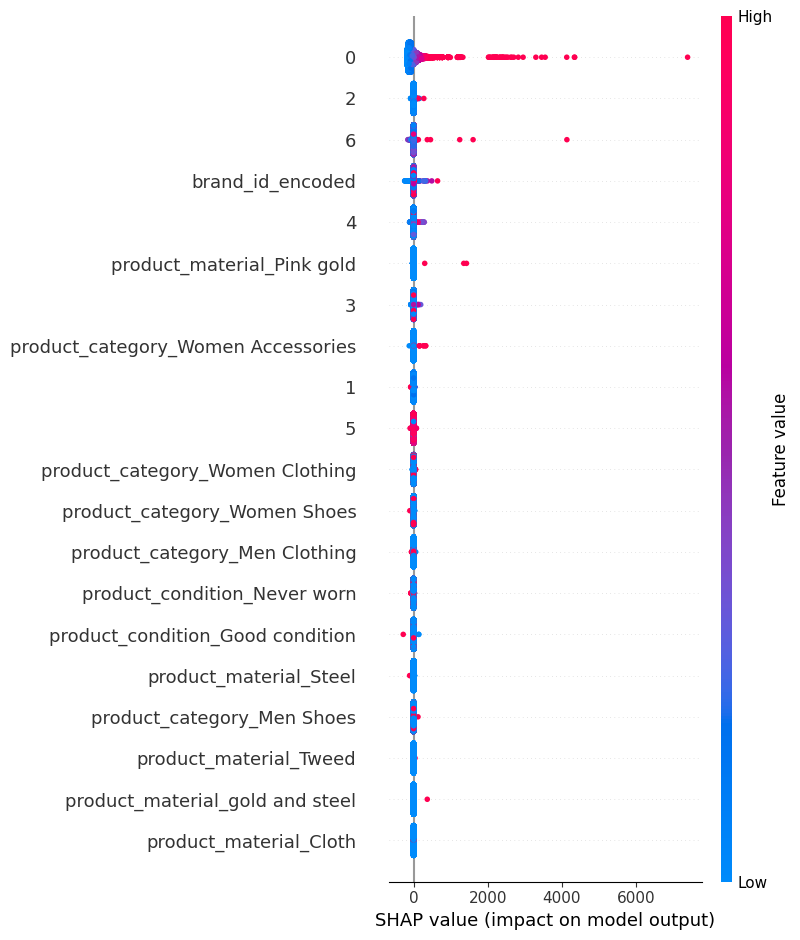

In [ ]:
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)
plt.show()

In [27]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


In [28]:
from sklearn.linear_model import LinearRegression

# Define the model (Linear Regression)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')

Train MSE: 128.39030965439747
Test MSE: 178.9812132571128
Train MAE: 4.081651540999533
Test MAE: 4.280099297088673
Train R2: 0.9985299494790191
Test R2: 0.996830711143985


Here we can see the performance of both models and check for overfitting. The LR outperforms the XGBoost in that case.

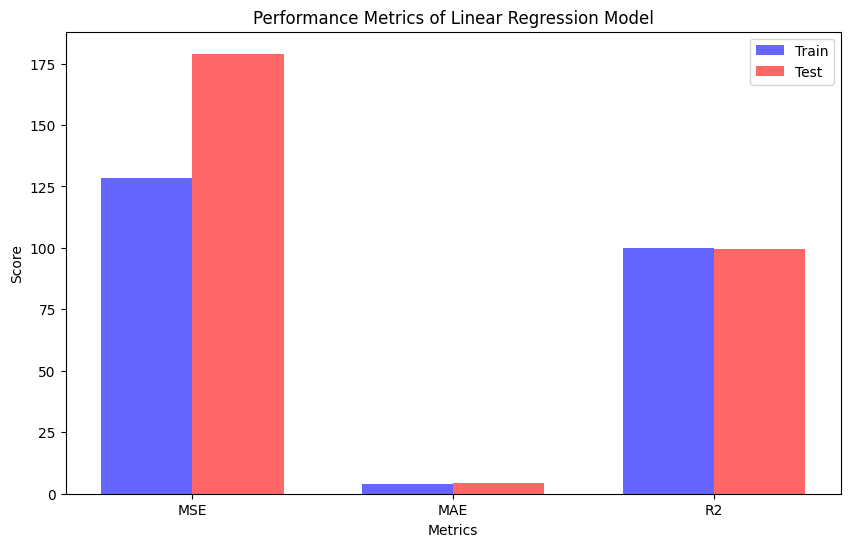

In [31]:
import matplotlib.pyplot as plt

# Evaluation metrics
metrics = ['MSE', 'MAE', 'R2']
train_scores = [128.3903096543974, 4.08165154099917, 99.85299494790191]
test_scores = [178.9812132571162, 4.280099297088284, 99.6830711143985]

# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(metrics))

plt.bar(index, train_scores, bar_width, label='Train', color='b', alpha=0.6)
plt.bar([i + bar_width for i in index], test_scores, bar_width, label='Test', color='r', alpha=0.6)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics of Linear Regression Model')
plt.xticks([i + bar_width/2 for i in index], metrics)
plt.legend()
plt.show()


We can also interpret the model by looking at the coefficients. 

In [32]:
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame for better readability
coef_df = pd.DataFrame(coefficients, X_train.columns, columns=['Coefficient'])
print("Intercept:", intercept)
print(coef_df)

Intercept: 193.03634806147636
                                    Coefficient
product_category_Men Clothing         -0.547569
product_category_Men Shoes            -1.498512
product_category_Women Accessories     0.497974
product_category_Women Clothing       -0.750465
product_category_Women Shoes          -0.646202
...                                         ...
2                                      5.556351
3                                      0.243564
4                                      3.828448
5                                     -0.078109
6                                     -0.514425

[83 rows x 1 columns]


For example, if the product material is Viscose, price increases by 5$.

In [33]:
coef_df.tail(20)

,Coefficient
product_material_Viscose,5.289216
product_material_Water snake,9.180241
product_material_White gold,2.027621
product_material_Wicker,3.551188
product_material_Wool,7.066930
product_material_Yellow gold,6.844714
product_material_gold and steel,-20.836530
seller_badge_Expert,0.352329
seller_badge_Trusted,0.145327
usually_ships_within_3-5 days,0.633478


In [ ]:
df['diff'] = df['price_usd'] - df['seller_price']
df['diff'].describe()

count    12426.000000
mean        38.242783
std         56.168735
min          0.000000
25%         13.140000
50%         24.070000
75%         46.540000
max       1970.250000
Name: diff, dtype: float64

## Step 4: Unsupervised part 

Now we are going to use a KMeans algorithm to group similar product in the same clusters. It could work as a recommendation system. We use the product description to get the attributes of the products.

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['product_description'])


We vectorize all the words found in the product descriptions in a dataframe and we use a TF-IDF Matrix (as we can see there are 14656 different words)

In [35]:
terms = vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to DataFrame and add column names
tfidf_df = pd.DataFrame(X.toarray(), columns=terms)

# Display the TF-IDF DataFrame
print("TF-IDF Matrix with Terms:")
print(tfidf_df.head(10))

TF-IDF Matrix with Terms:
    00  000  0000  000050  0001  0008  0008s  001  0016  002  ...   無單  \
0  0.0  0.0   0.0     0.0   0.0   0.0    0.0  0.0   0.0  0.0  ...  0.0   
1  0.0  0.0   0.0     0.0   0.0   0.0    0.0  0.0   0.0  0.0  ...  0.0   
2  0.0  0.0   0.0     0.0   0.0   0.0    0.0  0.0   0.0  0.0  ...  0.0   
3  0.0  0.0   0.0     0.0   0.0   0.0    0.0  0.0   0.0  0.0  ...  0.0   
4  0.0  0.0   0.0     0.0   0.0   0.0    0.0  0.0   0.0  0.0  ...  0.0   
5  0.0  0.0   0.0     0.0   0.0   0.0    0.0  0.0   0.0  0.0  ...  0.0   
6  0.0  0.0   0.0     0.0   0.0   0.0    0.0  0.0   0.0  0.0  ...  0.0   
7  0.0  0.0   0.0     0.0   0.0   0.0    0.0  0.0   0.0  0.0  ...  0.0   
8  0.0  0.0   0.0     0.0   0.0   0.0    0.0  0.0   0.0  0.0  ...  0.0   
9  0.0  0.0   0.0     0.0   0.0   0.0    0.0  0.0   0.0  0.0  ...  0.0   

   香港專門店購入  𝒸𝑜𝓃𝒹𝒾𝓉𝒾𝑜𝓃  𝓂𝑒𝒶𝓈𝓊𝓇𝑒𝓂𝑒𝓃𝓉𝓈  𝓈𝒾𝓏𝒾𝓃𝑔  𝗔𝗨𝗧𝗛𝗘𝗡𝗧𝗜𝗖𝗜𝗧𝗘  𝗗𝗥𝗢𝗜𝗧  𝗜𝗠𝗔𝗚𝗘  \
0      0.0        0.0           0.0     0.0           0.0    0.0    0.0   
1      0.

Now, to choose the appropriate number of clusters, we can use the elbow method and the silhouette score.

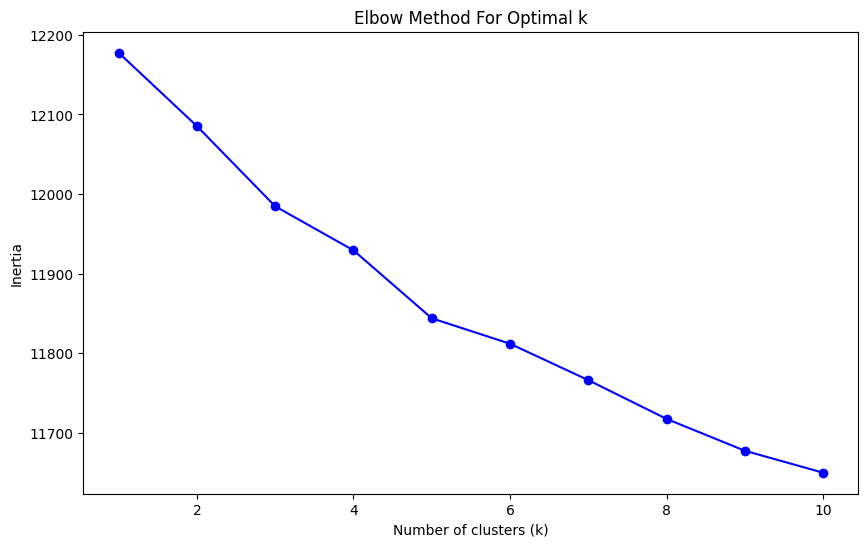

In [36]:

# Define the range of k values to test
k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [37]:
from sklearn.metrics import silhouette_score

k_values = range(35, 50)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))




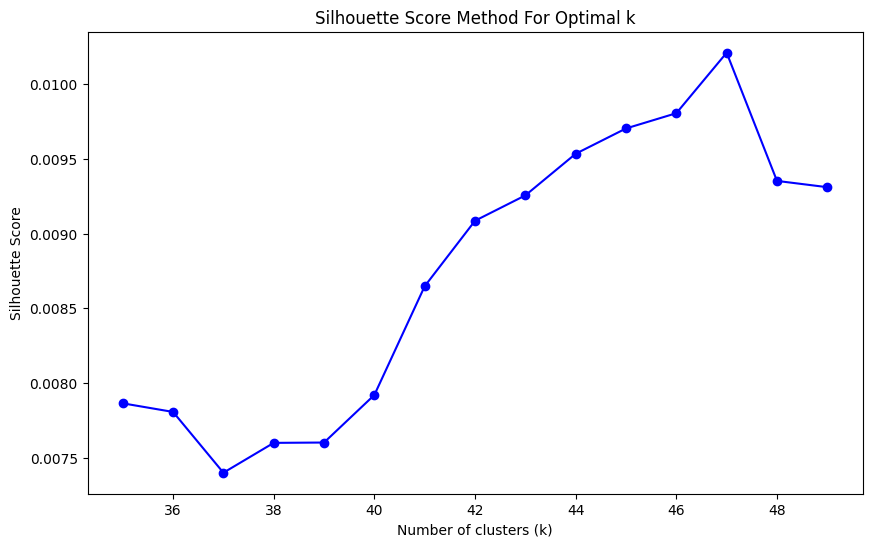

In [38]:
import matplotlib.pyplot as plt

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method For Optimal k')
plt.show()

It looks like a low number of clusters is not representative of the different products we have in this dataset as the silhouette score is low. 
Just for demonstration, I have tried with a 20 clusters even though it does not look like a good number of clusters based on the silhouette score. 

In [39]:

k = 20

# Step 3: Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Step 4: Interpret the results
df['cluster'] = kmeans.labels_

# Print cluster assignments
print(df[['product_description', 'cluster']])

# Evaluate clustering quality (optional)
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

                                     product_description  cluster
1      Tweed suit with lace edges. In perfect conditi...        7
2      Very elegant evening dress made of silk with l...       11
3      Gucci casual pants, rarely used, has a stitchi...       16
4      Knickers size 2 (uk 8)  Bra 32DD  Size labels ...        7
5      Isabel Marant black and white abstract print T...        5
...                                                  ...      ...
13730                                  pair of sneakers         2
13731  11cm heel, 2cm platform in front. Silver hardware        9
13733  Chanel n.39 sneakers, never worn - black base ...        2
13734              Made in Italy Size: 38 4 cm. of heel         9
13735  hardly worn shoes in black  with box heel 8 cm...        9

[12426 rows x 2 columns]
Silhouette Score: 0.005419087520820384


Here we first reduce the number of variables of the TF-IDF Vector to 2 components using PCA (Principal Compenent Analysis) and we visualize the clusters.

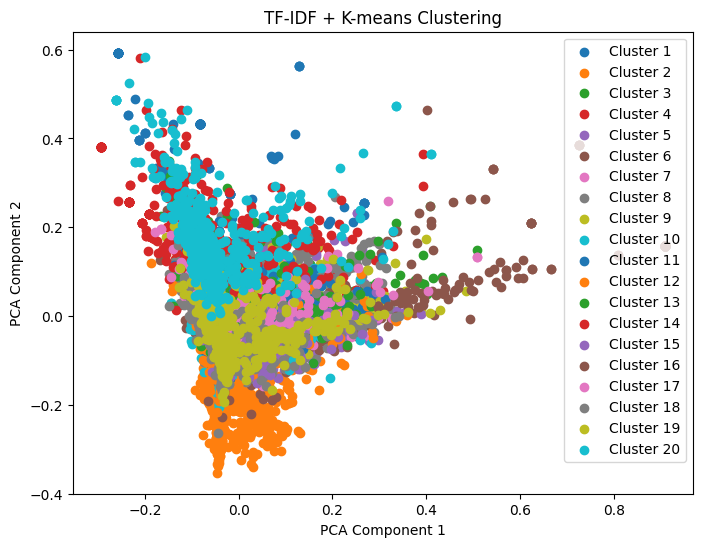

In [40]:

# Step 1: TF-IDF Vectorization
#tfidf_vectorizer = TfidfVectorizer(stop_words='english')
#tfidf_matrix = tfidf_vectorizer.fit_transform(df['product_description'])

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
tfidf_matrix_reduced = pca.fit_transform(X.toarray())

# Step 4: Visualize Clusters
plt.figure(figsize=(8, 6))

for i in range(k):
    cluster = tfidf_matrix_reduced[kmeans.labels_ == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i+1}')

plt.title('TF-IDF + K-means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

Now let's create some word maps of each clusters to have an idea of what kind of products we find inside.

In [41]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Assuming kmeans is your fitted KMeans model
centroids = kmeans.cluster_centers_


In [42]:
# Get the feature names (terms) from the TF-IDF vectorizer
terms = vectorizer.get_feature_names_out()

# Create a DataFrame to hold the top terms for each cluster
top_terms_per_cluster = {}

# Number of top terms to display
top_n = 10

for i in range(k):
    # Get the indices of the top n terms for the centroid of cluster i
    top_indices = centroids[i].argsort()[-top_n:][::-1]
    top_terms = [terms[ind] for ind in top_indices]
    top_terms_per_cluster[f'Cluster {i+1}'] = top_terms

# Convert to DataFrame for easier viewing
top_terms_df = pd.DataFrame(top_terms_per_cluster)
print(top_terms_df)


   Cluster 1     Cluster 2  Cluster 3  Cluster 4  Cluster 5  Cluster 6  \
0       worn            cm   sneakers    leather  excellent      shirt   
1        new        length       size       sole  condition     cotton   
2      times         width       worn     rubber       worn       size   
3       like      shoulder        box       size       size  condition   
4        tag        armpit    leather        box      times        new   
5  condition  measurements      white       worn    perfect       worn   
6    perfect          size        new        toe      shirt      white   
7      twice        sleeve  condition   material  beautiful       polo   
8     little         waist   original    sandals      great        100   
9       size         chest       good  condition       used       good   

   Cluster 7  Cluster 8  Cluster 9 Cluster 10 Cluster 11 Cluster 12  \
0     lauren       size       dior       heel      black      dress   
1      ralph       worn       wear         

There are some word maps from different clusters. For example, in the first cluster we mainly find worn articles.

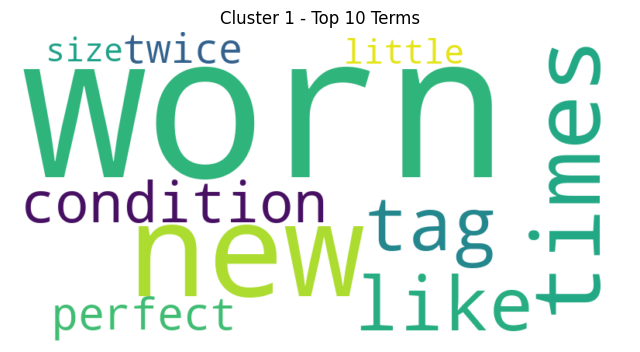

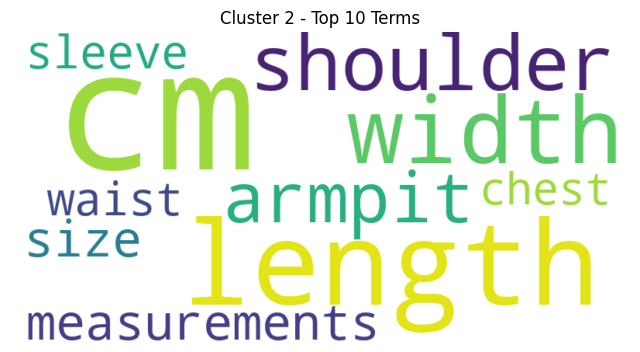

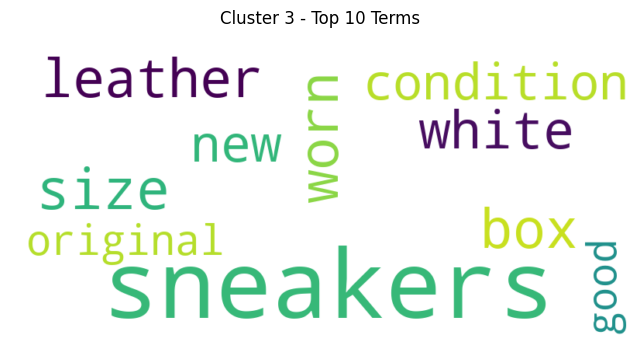

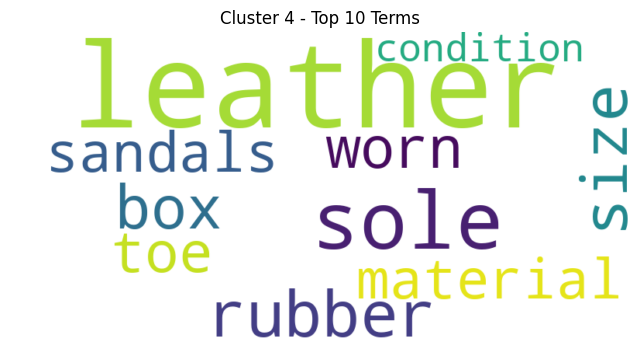

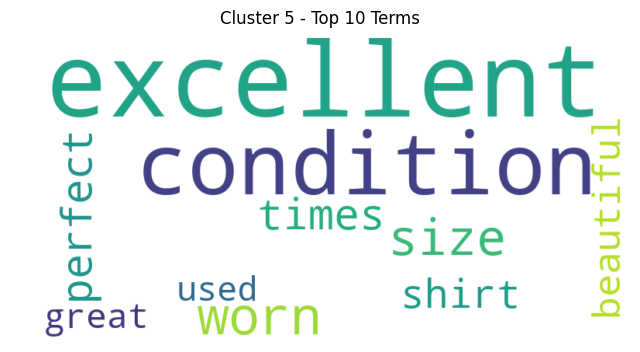

In [44]:
from wordcloud import WordCloud


# Initialize WordCloud object
wc = WordCloud(background_color="white", max_words=50, width=800, height=400)

# Plot word clouds for each cluster
for cluster_label in range(5):
    # Get the indices of the top n terms for the centroid of cluster i
    top_indices = kmeans.cluster_centers_[cluster_label].argsort()[-top_n:][::-1]
    top_terms = [terms[ind] for ind in top_indices]

    # Create a dictionary of word frequencies for the word cloud
    word_freq = {term: kmeans.cluster_centers_[cluster_label, idx] for idx, term in zip(top_indices, top_terms)}

    # Generate word cloud
    wc.generate_from_frequencies(word_freq)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Cluster {cluster_label + 1} - Top {top_n} Terms')
    plt.show()

## Step 5: Deep Learning

In this section we are going to use a deep learning model to predict if a product will be sold or not based on the price and its characteristics. 

We use a dataset from Vestiaire of around 45,000 products, 30% of them sold. 

In [45]:
df_nn=pd.read_csv('NN.csv')

/var/folders/6v/qvykl7vd2yb8gqx3qb10rc5m0000gn/T/ipykernel_97999/543604194.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nn=pd.read_csv('NN.csv')


In [46]:
df_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44773 entries, 0 to 44772
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  44773 non-null  int64  
 1   product_id                  44773 non-null  int64  
 2   product_type                44773 non-null  object 
 3   product_name                44773 non-null  object 
 4   product_description         44773 non-null  object 
 5   product_keywords            44710 non-null  object 
 6   product_gender_target       44773 non-null  object 
 7   product_category            44710 non-null  object 
 8   product_season              44773 non-null  object 
 9   product_condition           44773 non-null  object 
 10  product_like_count          44773 non-null  float64
 11  sold                        44773 non-null  bool   
 12  reserved                    44773 non-null  bool   
 13  available                   447

In [47]:
df_nn.drop(columns=['Unnamed: 0','has_cross_border_fees','buyers_fees'],inplace=True)

In [48]:
df_nn.dropna(inplace=True)

We select the final variables after some cleaning.

In [49]:

processed_df=df_nn.drop(columns=['product_id','seller_id','seller_username','product_gender_target',
                 'reserved','available','in_stock','should_be_gone','product_name',
                 'product_description','product_keywords','brand_url','brand_name','seller_country','warehouse_name','product_type','product_color','seller_earning']).reset_index()

In [ ]:
processed_df.sold.value_counts()

sold
False    25555
True     12426
Name: count, dtype: int64

In [ ]:
processed_df.drop(columns=['index'],inplace=True)

In [ ]:
processed_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37981 entries, 0 to 37980
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category            37981 non-null  object 
 1   product_season              37981 non-null  object 
 2   product_condition           37981 non-null  object 
 3   product_like_count          37981 non-null  float64
 4   sold                        37981 non-null  bool   
 5   brand_id                    37981 non-null  int64  
 6   product_material            37981 non-null  object 
 7   price_usd                   37981 non-null  float64
 8   seller_price                37981 non-null  float64
 9   seller_badge                37981 non-null  object 
 10  usually_ships_within        37981 non-null  object 
 11  seller_products_sold        37981 non-null  float64
 12  seller_num_products_listed  37981 non-null  float64
 13  seller_community_rank       379

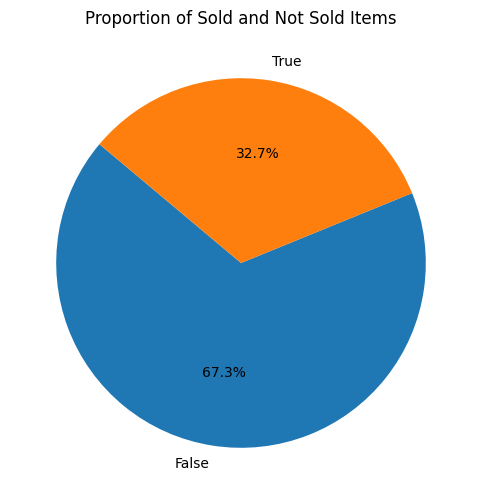

In [ ]:
sold_counts = processed_df['sold'].value_counts()

# Plotting Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sold_counts, labels=sold_counts.index.astype(str), autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Sold and Not Sold Items')
plt.show()

Now we scale and apply label and hot encoder to categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

X = processed_df.drop('sold', axis=1)
y = processed_df['sold'].astype(int)  # Ensure y is numeric (0 or 1)

le = LabelEncoder()
X['brand_id_encoded'] = le.fit_transform(X['brand_id'])

# Example: Scaling numerical features
X_numerical = processed_df[[
                             'price_usd','seller_products_sold',
                            'seller_num_products_listed', 'seller_community_rank',
                            'seller_num_followers', 'seller_pass_rate','product_like_count'
                            ]]

# Step 1: Scale the numerical data
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Step 2: One-hot encode other categorical variables
categorical_features = [ 'product_category', 'product_season', 'product_condition',
                        'product_material', 'seller_badge', 'usually_ships_within']

X_categorical = pd.get_dummies(X[categorical_features], drop_first=True)

X_categorical=X_categorical.astype(int)
combined_X = pd.concat([X_categorical, pd.DataFrame(X['brand_id_encoded']), pd.DataFrame(X_numerical_scaled)], axis=1)



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_X, y, test_size=0.2, random_state=42)


In [ ]:
y_train

28782    1
32935    1
17766    0
23036    0
23792    0
        ..
16850    0
6265     0
11284    0
860      0
15795    0
Name: sold, Length: 30384, dtype: int64

Finally, we use a sequential model from TensorFlow with dense layers and dropout layers to decrease the chances of overfitting. We train it for 100 epochs and we evaluate it. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.utils import class_weight



# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Example dropout layer
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),  # Example dropout layer
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')



Epoch 1/100
950/950 [==============================] - 5s 3ms/step - loss: 0.7880 - accuracy: 0.6470 - val_loss: 0.6293 - val_accuracy: 0.6700
Epoch 2/100
950/950 [==============================] - 6s 6ms/step - loss: 0.6295 - accuracy: 0.6704 - val_loss: 0.6138 - val_accuracy: 0.6700
Epoch 3/100
950/950 [==============================] - 4s 4ms/step - loss: 0.6118 - accuracy: 0.6723 - val_loss: 0.5917 - val_accuracy: 0.6700
Epoch 4/100
950/950 [==============================] - 3s 3ms/step - loss: 0.5921 - accuracy: 0.6742 - val_loss: 0.5818 - val_accuracy: 0.6870
Epoch 5/100
950/950 [==============================] - 3s 3ms/step - loss: 0.5735 - accuracy: 0.7040 - val_loss: 0.5473 - val_accuracy: 0.7237
Epoch 6/100
950/950 [==============================] - 4s 4ms/step - loss: 0.5559 - accuracy: 0.7196 - val_loss: 0.5546 - val_accuracy: 0.7327
Epoch 7/100
950/950 [==============================] - 4s 4ms/step - loss: 0.5459 - accuracy: 0.7273 - val_loss: 0.5375 - val_accuracy: 0.7338

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                5696      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dense_38 (Dense)            (None, 32)                1056      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_39 (Dense)            (None, 32)               

In [ ]:
y_pred=model.predict(X_test)

238/238 [==============================] - 0s 2ms/step


In [ ]:
y_pred_train=model.predict(X_train)
y_pred_train = (y_pred_train >= 0.5).astype(int)


950/950 [==============================] - 3s 3ms/step


In [ ]:
y_pred_int = (y_pred >= 0.5).astype(int)


In [ ]:
y_pred_int

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_acc = balanced_accuracy_score(y_test, y_pred_int)
balanced_acc

0.7106523737464373

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_acc = balanced_accuracy_score(y_train, y_pred_train)
balanced_acc

0.7399319856092104

This model predicts wheter an article will be sold or not with an accuracy of 71%, with no signs of overfitting.